# Fourier Analysis and Transform

## Discrete-Time Fourier Transform

For an absolutely summable discrete signal of 
$x(n)$,
its discrete Fourier transform is given by \\
$$X(j\omega) \triangleq \mathcal F [x(n)] = \sum_{n=0}^{N-1} x(n) e^{-j\omega n}$$

If $x(n)$ has finite duration, then we can numerically evaluate $X(j\omega)$ over $[0, \pi]$ frequencies.

Computing $X(j\omega)$ over equispaced frequencies can be done in a form of matrix-vector multiplication. 

For M+1 equispaced discrete frequencies of 
 $\omega_k \triangleq \frac{\pi}{M}k$,   for $k = 0, 1, \dots, M$, \\

$$ X(j\omega_k) = \sum_{l=1}^N e^{-j \omega_k n_l}x(n_l) $$

Rearranging ${x(n_l)}$ and $X(j\omega_k)$ as colume vectors $\mathbf x$ and $\mathbf X$, we get 

$$\mathbf {X} = \mathbf W \mathbf{ x}$$


where the (M+1)-by-N matrix $\mathbf W$ can be defined in terms of the row vectors $\mathbf k = \{k\}$ and $\mathbf n = \{n_l\}$

$$\mathbf W \triangleq \big[ \text{exp}(-j\frac{\pi}{M}\mathbf k^T \mathbf n) \big] $$



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

PI = np.pi 

def DTFT(x, omega):
    N = len(x)
    n = np.arange(N)
    w = np.exp(-1j * np.outer(omega, n))
    X = np.dot(w,x)
    return X

### Example
Let's compute the DTFT of signal $x(n) = (0.5)^n$, $0\leq n < 10$  at 501 equispaced points between [0, $\pi$] 

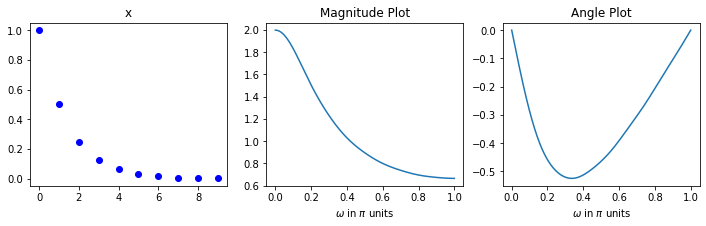

In [ ]:
omega = np.arange(0,501)*PI/500
n = np.arange(0, 10)
x = (0.5)**n
X = DTFT(x, omega)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.plot(x, 'bo')
plt.title("x")

plt.subplot(132)
plt.plot(omega/PI, np.abs(X))
plt.xlabel("$\omega$ in $\pi$ units")
plt.title("Magnitude Plot")

plt.subplot(133)
plt.plot(omega/PI, np.angle(X))
plt.xlabel("$\omega$ in $\pi$ units")
plt.title("Angle Plot")
plt.show()

### Question 1
Compute the DFT of a signal $x(n) = (0.9 e^{j\pi/3})^n$, $0\leq n < 10$ 
 at a total of 401 discrete frequencies over the two periods between $[-2\pi, 2\pi]$

In [ ]:
# your code here



##Discrete Fourier Series
In DTFT, the $\omega$ is a continuous variable, which means $X(j\omega)$ cannot be fully computed using numerical methods. (We can only evaluate its value at some points) 

For numerically computable transforms, let's first consider a periodic signal. 
A periodic, discrete sequence $\tilde x(n)$ satiesfies $\tilde x(n) = \tilde x(n+kN)$ for all n, k, where N is the fundamental period of the sequence.  

We know that periodic functions can be expressed as a linear combination of complex exponentials whose frequencies are multiples of $2\pi/N$

$$\tilde x(n) = \frac{1}{N}\sum_{k=0}^{N-1} \tilde X(k) e^{j \frac{2\pi}{N}kn}, n = 0, \pm 1, \dots$$

Where $\tilde X(k)$ are discrete Fourier series coefficients, given by

$$\tilde X(k) = \sum_{n=0}^{N-1}\tilde x(n) e^{-j\frac{2\pi}{N}nk}, k=0, \pm 1, \dots$$

DFS can be computed numerically using the following matrix-vector multiplication.

$$\mathbf {\tilde X} = \mathbf {W}_N \mathbf{\tilde x}$$

$$\mathbf {\tilde x} = \frac{1}{N} \mathbf {W}_N^* \mathbf{\tilde X}$$

where the N-by-N DFS matrix $\mathbf {W}_N$ is given by

$$\mathbf {W}_N = \begin{bmatrix} 
1 & 1 & \dots &1\\
1 & W_N^1 & \dots & W_N^{(N-1)}\\
\vdots & \vdots & \ddots & \vdots\\
1 & W_N^{(N-1)} & \dots & W_N^{(N-1)^2}
\end{bmatrix}$$

where $W_N \triangleq e^{-j\frac{2\pi}{N}}$

Now, try implementing DFS and IDFS below



In [ ]:
def DFS(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j*PI*k*n / N)
    X = np.dot(e, x)
    return X
    

### Question 2
Define inverse DFS using a similar matrix operation. 

In [ ]:
def IDFS(X):
    # Your code here
   
    return x

SyntaxError: ignored

### Question 3
Now, let's try creating a periodic square wave sequence with fundamental period of N and duty cycle of L and compute its DFS. Try $N=20$ and $L=5$ . 
Compute the Fourier series coefficients and plot them. Also, try reconstructing the original sequence using the Fourier series coefficients.

In [ ]:
def squarewave(N,L):
    x = np.zeros(N)
    x[np.arange(0,L)]=1
    return x

x = squarewave(20,5)
print(x)
plt.figure
plt.plot(x, 'bo')
plt.show()

# Your code here


## Discrete Fourier Transform
To develop numerically computable Fourier representation of non-periodic signals, we define a periodic signal whose primary shape is that of the finite-duration signal. Using the DFS on this periodic signal, we can practically define and compute a new tranform, named discrete Fourier transform. 

For a N-point sequence $x(n)$, we define a periodic signal 
$$ \tilde x(n) = \sum_{r=-\infty}^{\infty} x(n-rN)$$

Now, the discrete Fourier transform of the sequence is defined as

$$ X(k) \triangleq \text{DFT}[x(n)] = \begin{cases} 
\tilde X(k) \text{, 0 $\leq$ k $\leq$ N-1} \\
0 \text{, elsewhere} 
\end{cases} = \tilde X(k)\mathcal R_N(k) = \sum_{n=0}^{N-1} x(n)W_N^{nk}$$

where $\mathcal R_N(k)$ is a window operation.

We can easily see that the DFT matrix is the same as the DFS matrix defined earlier. 

In [ ]:
def DFT(x):
    X = DFS(x)
    return X

def IDFT(X):
    x = IDFS(X)
    return x
    

### Question 4
For a four-point sequence 
$$x(n) = \begin{cases} 1 \text{, 0 $\leq n \leq$ 3} \\ 0 \text{, otherwise} 
\end{cases}$$ 
Compute and plot the four-point DFT of $x(n)$. 





In [ ]:
# Your code here


### Question 5
How can we obtain DFT values at finer frequencies? First, for x(n) in Q3, try using the DTFT to get $X(j\omega_k)$ at finer frequencies between [0, $2\pi$]. Plot $X(j\omega_k) in pi-units and overlay your results from Q4

In [ ]:
# Your code here



### Question 6
Now, in order to get DFT values at finer frequencies, try using DFT to get the 16-point DFT of the same $x(n)$ as Q3. Explain your method. What does this result imply?

In [ ]:
# Your code here


## Fast Fourier Transform
For an N-point sequence $x(n)$, computation of N-point DFT needs a complete set of DFT coefficients, which require $N^2$ multiplications and $N(N-1)$ complex additions. For a large N, computing and storing the DFT matrix becomes very inefficient. To perform DFT in a more efficient manner, FFT algorithm has been developted, which exploits the symmetry in DFT. 
For more detail on the FFT algorithms, refer to [reference](https://web.eecs.umich.edu/~fessler/course/451/l/pdf/c6.pdf).

In MATLAB, the built-in fft function is written as a mixed-radix algorithm. If N is a power of two, then a high-speed radix-2 FFT algorithm is employed. If N is not a power of two, then N is decomposed into prime factors and a slower mixed-radix FFT algorithm is used. Finally, if N is a prime number, then the fft function is reduced to the raw DFT algorithm.


In [ ]:
x = np.random.random(256)

%timeit DFT(x)


In [ ]:
%timeit np.fft.fft(x)


## Linear Convolution
DFT has many useful properties such as linearity, circular folding, symmetry properties (for real sequences) and so on. (Make sure you refresh your memory of Signals and Systems) 

One of the most important operation in linear systems is the linear convolution. 
Linear convolution of two sequences of length $N_1$ and $N_2$ can be defined as
$$ x_3(n) = x_1(n) * x_2(n) = \sum_{k=0}^{N_1-1} x_1(k)x_2(n-k) $$

Then x_3(n) is an $(N_1+N_2-1)$-point sequence. 

In general, a circular convolution is an aliased version of a linear convolution. If we perform $(N_1+N_2-1)$-point circular convolution of $x_1(n)$ and $x_2(n)$, the result is equivalent to the linear convolution without any aliasing in the time domain. 

By the convolution theorem, we can compute linear convolutions using Fourier transforms. Fast convolution is also possible using N-point FFT.

$$ x_1(n) * x_2(n) = \text{IFFT}[\text{FFT} [x_1(n)] \cdot \text{FFT}[x_2(n)]] $$

For high-speed convolution (radix-2 method) without aliasing, N should be chosen as
$$ N = 2^{\lceil \text{log}_2(N_1+N_2 -1)\rceil}$$

where $\lceil x \rceil$ is the smallest integer greater than x. 



### Question 7
Compute linear convolution of two sequences

In [ ]:
def conv1d(x1, x2):
    # Your code here
    


# your code here


###Question 8
Compute fast linear convolution using FFT and compare your results with Q6. It should be identical

In [ ]:
def fftconv(x1, x2): 
    # Your code here  
    


# Generating time-domain and freq-domain signals
Before we begin processing signals, let's first generate discrete time-domain signals to play with.





### Example 2
Let's generate 3 sine waves with frequencies 1 Hz, 4 Hz, and 7 Hz, amplitudes 3, 1 and 0.5, and all zero phases. Add this 3 sine waves together with a sampling rate 50 Hz.

In [ ]:
# sampling rate (Hz)
s_r = 50
# sampling interval (sec)
t_s = 1.0/s_r
duration = 1
t = np.arange(0,duration,t_s)

freq = 1
x = 3*np.sin(2*PI*freq*t)

freq = 4
x += np.sin(2*PI*freq*t)

freq = 7   
x += 0.5* np.sin(2*PI*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.ylabel('Time(s)')
plt.show()


### Question 9
Compute DFT of the signal and plot the amplitude of the DFT. Let the x-axis be the frequency in Hz unit.



In [ ]:
# your code here



## Question 10
Repeat using FFT. Use np.fft.fftshift to flip the frequency domain axis and center the 0 frequency. Plot the result in a proper x-axis units. What are the frequency and magnitude of the non-zero values in the spectrum? 


In [ ]:
# Your code here

## Question 11

Now, try generating the same signal in the frequency domain. (By defining X(k) using the conditions given in example)
Use sampling frequency of 100 Hz. First define $X(k)$ and then compute $x(n)$ using IFFT. 

In [ ]:
# Your code here

# Filters



## Filtering in the time domain
A discrete-time system maps a discrete-time input signal $x(n)$ into an output signal $y(n)$. A discrete-time system can be defined by a linear, constant-coefficient difference equations;

$$ y(n) = \sum_{k=1}^K a_k y(n-k) + \sum_{m=0}^M b_m x(n-m) $$

Some useful examples are;


*   Simple amplifier : $y(n) = Gx(n)$
*   Delay : $y(n) = x(n-n_0)$
* two-point moving average : $y(n) = \frac{1}{2}(x(n)+x(n-1))$
* Averaging over duraion over N consecutive epochs of duation L : $y(n) = \frac{1}{N}\sum_{k=0}^{N=1}x(n-kL)$
* "leaky integrator" or first-order lowpass filter :$y(n) = ay(n-1) + x(n)$ with 0 <a <1.

Digital filters can be classified into the basis of the equation above. 
If all the $a_k$ coefficients are zero, then the output only depnds on a finite number of vlues of the input. Such filters are called finite impulse response (FIR) filters. (see examples above)
If at least one of the $a_k$ coefficients are nonzero, the filter is called inifinite impulse response (IIR_ filters). 


### Example 3
Let's first create a noisy signal

In [ ]:
# sampling rate (Hz)
s_r = 500
# sampling interval (sec)
t_s = 1.0/s_r
duration = 1
t = np.arange(0,duration,t_s)

freq = 2
x = 5*np.sin(2*PI*freq*t)

# add noise
x += np.random.rand(s_r)

plt.figure
plt.plot(x)

### Question 12
Try applying moving average filter of various window sizes

In [ ]:
# your code here


## Filtering in the frequency domain

If you know the sources of the noises and their typical frequencies, you can use frequency-selective filters to accurately or approximately select some bands of frequencies and reject others. It can be a lowpass, highpass or bandpass filters chosen with suitable cutoff frequencies to separate the passband and the stop band. 
A simple and ideal frequency-selective filter can be defined in the frequency domain. For example, a continuous time ideal LPF is;

$$ H(j\omega) = \begin{cases} 1 \text{, $|\omega|\leq \omega_c$} \\ 0 \text{, $|\omega|> \omega_c$}\end{cases} $$


### Question 13
For the signal in example 2, try selecting/blocking each of the sinusoids in the frequency domain

In [ ]:
# Your code here

# Assignment 

A sample data from real ECG measurement is provided on Learnus website. 
With the sample data, process the signal and answer following questions


1.   First, plot the signal as a function of time. Discuss about any observations on this signal. 
2. Any guess on the electrode vector for this ecg measurement? Explain. 
3.   Analyse and Filter the signal and plot a clean ecg traces. Explain your methods and discuss about the noise components. 
4. Measure the heartrate from this signal. Are there any variablities in the heartrate over time? Explain your methods and discuss about your results. 

